# A intensão desta análise é estudar o peso dos dados socioeconômicos na composição da nota atravez de regressão linear.

In [ ]:
pip install pyjanitor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import janitor as jn
from scipy.stats import chi2_contingency
import numpy as np

In [ ]:
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv(filepath_or_buffer = '/content/drive/MyDrive/TCC/MICRODADOS_ENEM_2021.csv', sep=";", encoding = "cp860")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1 = df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
variaveis_categoricas = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
                         'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
                         'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
                         'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
                         'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_LC',
                         'CO_PROVA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
                         'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

for coluna in variaveis_categoricas:
    df1[coluna] = df1[coluna].astype('object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.dtypes

In [ ]:
df2 = df.loc[(df['SG_UF_ESC'] == 'SP') & (df['IN_TREINEIRO'] == 0) & (df['TP_PRESENCA_CN'] == 1) &
            (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1) & (df['TP_ENSINO'] == 1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2 = jn.clean_names(df2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2.shape

In [ ]:
df2.isna().any().any()

Removendo colunas constantes

In [ ]:
df3 = df2.drop(columns=['nu_ano', 'tp_st_conclusao',
                        'tp_ano_concluiu', 'tp_ensino', 'in_treineiro',
                       'co_uf_esc', 'sg_uf_esc', 'tp_presenca_cn',
                        'tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt'
                       ])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df3.to_csv('/content/drive/MyDrive/TCC/dados_sp_presentes.csv', index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df3 = pd.read_csv(filepath_or_buffer = '/content/drive/MyDrive/TCC/dados_sp_presentes.csv', sep=",")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nu_inscricao,tp_faixa_etaria,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,tp_escola,co_municipio_esc,no_municipio_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,co_municipio_prova,no_municipio_prova,co_uf_prova,sg_uf_prova,co_prova_cn,co_prova_ch,co_prova_lc,co_prova_mt,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,tx_respostas_cn,tx_respostas_ch,tx_respostas_lc,tx_respostas_mt,tp_lingua,tx_gabarito_cn,tx_gabarito_ch,tx_gabarito_lc,tx_gabarito_mt,tp_status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025
0,210052097511,3,F,1,1,1,2,3552205.000000,Sorocaba,4.000000,1.000000,1.000000,3552205,Sorocaba,35,SP,911.000000,880.000000,890.000000,902.000000,679.200000,650.800000,651.100000,724.700000,CDCBBAABEBEDEEEEBADBBBAABCDBCCBDCCBAECDABEEDA,DBBAAEEEBBABCECDAAAAAEBEACCECBEDBEBABAABCBDBC,ABBCA99999CCCACCAADABBDDBEDDACEADCBBDDACBDDDDA...,BCACABDCCEDDCDBCCADAEAEBADEDDBCCCAEBEDBCCEDDA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.000000,160.000000,120.000000,140.000000,140.000000,160.000000,720.000000,D,C,D,B,2.000000,B,A,B,C,A,A,B,B,B,A,B,A,A,B,B,A,C,B,C,B
1,210053495342,3,F,1,1,1,2,3550308.000000,Sπo Paulo,2.000000,1.000000,1.000000,3550308,Sπo Paulo,35,SP,910.000000,879.000000,889.000000,900.000000,400.600000,515.600000,414.700000,440.300000,CBEDDCEBBADAEBECEBEBCDAEBDEBCEDEECEBBEDEDBBBA,ADDCDBADBBDECEBDCBEAABECCAEBACAABEABDEABDADDB,EEBCA99999CBABDEDADBECECDDABEDBDBCCACCBDDAEBAB...,BCDDCEDEDBACCEDABCBDCACDCADBDEEABBECCDECABDEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.000000,80.000000,120.000000,100.000000,120.000000,120.000000,540.000000,E,E,C,D,5.000000,B,A,C,B,A,A,B,B,B,A,A,A,A,B,A,B,E,A,A,B
2,210053524905,2,F,1,1,1,2,3548708.000000,Sπo Bernardo do Campo,2.000000,1.000000,1.000000,3548708,Sπo Bernardo do Campo,35,SP,911.000000,880.000000,890.000000,902.000000,617.100000,658.700000,576.000000,710.300000,CABCDBACEDECEECCBEAECCCABCDEACEACDEADCCBBBEAC,BBBAAEACBBABEEDECAAAACBCDCAEADEEDEBBCBDDCBACE,ACBCA99999CCDACCCACCBACAEDBDAEEAEEEBDAACDEDABD...,ECCBABBCDDDDDEDCCABADEEBACDBCEDDCBAABBBDBDCAB,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.000000,160.000000,200.000000,160.000000,200.000000,200.000000,920.000000,E,G,D,D,4.000000,I,A,C,C,B,A,B,B,B,A,B,A,B,B,A,B,E,A,C,B
3,210051235712,2,F,1,1,1,2,3554508.000000,TietΩ,2.000000,1.000000,1.000000,3554508,TietΩ,35,SP,912.000000,882.000000,891.000000,901.000000,485.100000,454.500000,535.000000,459.100000,DCBCBEDAEDBBAAEEABEBCEACBDBDAECDEACCECADBBCCA,DAACEACEACDABCAECDEBACACDCAACBDCADBCCDBAAAEBE,ACDDB99999DBDACCABABDCEACDDABDBAEBCEDAADDCBCCD...,ACED*ECCDBCCCEAACEEDBBBECEDCBDBADCDBABDECCADB,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.000000,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000,D,E,C,B,4.000000,G,A,B,D,B,A,B,B,B,A,B,A,B,B,A,A,E,A,B,B
4,210051574300,2,F,1,3,1,2,3503802.000000,Artur Nogueira,2.000000,1.000000,1.000000,3503802,Artur Nogueira,35,SP,910.000000,879.000000,889.000000,900.000000,415.900000,407.500000,428.200000,425.800000,BCEACCADCDCEDDBBEEBCACBEADCEDCECBCCDCDCCCBCAC,CDCBCAEBBDABDBEBCEBDDBDDBAECBEECACBADADDDCBDC,99999EEADAAABEDADCCBBDACDBECEAAECBCDEAEBACAAAD...,DBEDDABCCBCBEDADCCCACAECEECDCADEDACECEECBBADA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEB

removendo colunas com infos repetidas, causam


In [ ]:
crosstab = np.array(pd.crosstab(df_encoded['co_uf_prova'],df_encoded['sg_uf_prova'], rownames=None, colnames=None)) # Cross table building
stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
obs = np.sum(crosstab) # Number of observations
mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
(stat/(obs*mini))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

In [ ]:
crosstab = np.array(pd.crosstab(df_encoded['co_municipio_esc'],df_encoded['no_municipio_esc'], rownames=None, colnames=None)) # Cross table building
stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
obs = np.sum(crosstab) # Number of observations
mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
(stat/(obs*mini))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

removendo as variaveis de respostas, iriam influenciar o resultado \ removendo gabarito,não tem relação com o aluno \ removendo 'co_municipio_esc', 'co_municipio_prova', 'co_uf_prova', vars repetidas

In [ ]:
df4 = df3.drop(columns=['co_municipio_esc', 'co_municipio_prova', 'co_uf_prova', 'tx_respostas_lc', 'tx_respostas_mt', 'tx_respostas_ch', 'tx_respostas_cn',
'tx_gabarito_cn', 'tx_gabarito_ch', 'tx_gabarito_lc', 'tx_gabarito_mt'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df4.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['nu_inscricao', 'tp_faixa_etaria', 'tp_sexo', 'tp_estado_civil',
       'tp_cor_raca', 'tp_nacionalidade', 'tp_escola', 'no_municipio_esc',
       'tp_dependencia_adm_esc', 'tp_localizacao_esc', 'tp_sit_func_esc',
       'no_municipio_prova', 'sg_uf_prova', 'co_prova_cn', 'co_prova_ch',
       'co_prova_lc', 'co_prova_mt', 'nu_nota_cn', 'nu_nota_ch', 'nu_nota_lc',
       'nu_nota_mt', 'tp_lingua', 'tp_status_redacao', 'nu_nota_comp1',
       'nu_nota_comp2', 'nu_nota_comp3', 'nu_nota_comp4', 'nu_nota_comp5',
       'nu_nota_redacao', 'q001', 'q002', 'q003', 'q004', 'q005', 'q006',
       'q007', 'q008', 'q009', 'q010', 'q011', 'q012', 'q013', 'q014', 'q015',
       'q016', 'q017', 'q018', 'q019', 'q020', 'q021', 'q022', 'q023', 'q024',
       'q025'],
      dtype='object')

In [ ]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df5 = pd.DataFrame()
colunas_n_categoricas = ['nu_inscricao', 'nu_nota_cn', 'nu_nota_ch', 'nu_nota_lc', 'nu_nota_mt', 'nu_nota_comp1',
                         'nu_nota_comp2', 'nu_nota_comp3', 'nu_nota_comp4', 'nu_nota_comp5', 'nu_nota_redacao']
for i in df4.columns:
  if i not in colunas_n_categoricas:
    df5[i]=label.fit_transform(df4[i])
  else:
    df5[i]=df4[i]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


não faz sentido ter na analise

In [ ]:
df6 = df5.drop(columns=['co_prova_cn', 'co_prova_ch', 'co_prova_lc', 'co_prova_mt'])
# codigos do tipo da prova

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nu_inscricao,tp_faixa_etaria,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,tp_escola,no_municipio_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,no_municipio_prova,sg_uf_prova,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,tp_lingua,tp_status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025
0,210052097511,2,0,1,1,1,0,524,3,0,0,316,23,679.200000,650.800000,651.100000,724.700000,0,0,160.000000,120.000000,140.000000,140.000000,160.000000,720.000000,3,2,3,1,1,1,0,1,2,0,0,1,1,1,0,1,0,0,1,1,0,2,1,2,1
1,210053495342,2,0,1,1,1,0,546,1,0,0,338,23,400.600000,515.600000,414.700000,440.300000,0,0,80.000000,120.000000,100.000000,120.000000,120.000000,540.000000,4,4,2,3,4,1,0,2,1,0,0,1,1,1,0,0,0,0,1,0,1,4,0,0,1
2,210053524905,1,0,1,1,1,0,530,1,0,0,319,23,617.100000,658.700000,576.000000,710.300000,0,0,160.000000,200.000000,160.000000,200.000000,200.000000,920.000000,4,6,3,3,3,8,0,2,2,1,0,1,1,1,0,1,0,1,1,0,1,4,0,2,1
3,210051235712,1,0,1,1,1,0,575,1,0,0,352,23,485.100000,454.500000,535.000000,459.100000,0,0,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000,3,4,2,1,3,6,0,1,3,1,0,1,1,1,0,1,0,1,1,0,0,4,0,1,1
4,210051574300,1,0,1,3,1,0,35,1,0,0,21,23,415.900000,407.500000,428.200000,425.800000,1,0,100.000000,40.000000,40.000000,120.000000,40.000000,340.000000,1,4,0,0,3,1,0,1,3,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111605,210054345433,2,0,1,1,1,0,235,1,0,0,146,23,506.200000,533.500000,506.700000,554.200000,0,0,120.000000,120.000000,120.000000,120.000000,80.000000,560.000000,4,4,1,1,2,4,0,1,2,1,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1
111606,210053949633,1,0,1,1,1,0,393,1,0,0,116,23,523.000000,534.600000,538.700000,516.800000,0,0,120.000000,200.000000,120.000000,140.000000,120.000000,700.000000,1,1,0,1,6,4,0,1,3,1,0,1,1,1,0,0,0,0,1,0,0,4,0,0,1
111607,210054354738,2,1,1,3,1,0,365,1,0,0,231,23,471.900000,545.700000,543.700000,538.900000,0,0,120.000000,140.000000,120.000000,120.000000,120.000000,620.000000,3,3,3,1,4,2,0,2,3,1,0,1,1,1,0,1,0,1,1,0,0,4,0,1,1
111608,210053127680,1,0,1,3,1,0,539,1,0,0,326,23,545.900000,579.700000,592.900000,580.600000,0,0,120.000000,120.000000,100.000000,120.000000,0.000000,460.000000,1,4,2,1,5,2,0,2,3,0,0,2,2,1,1,1,0,0,2,0,0,4,0,0,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Mapa de calor da Correlação das Variáveis'}>

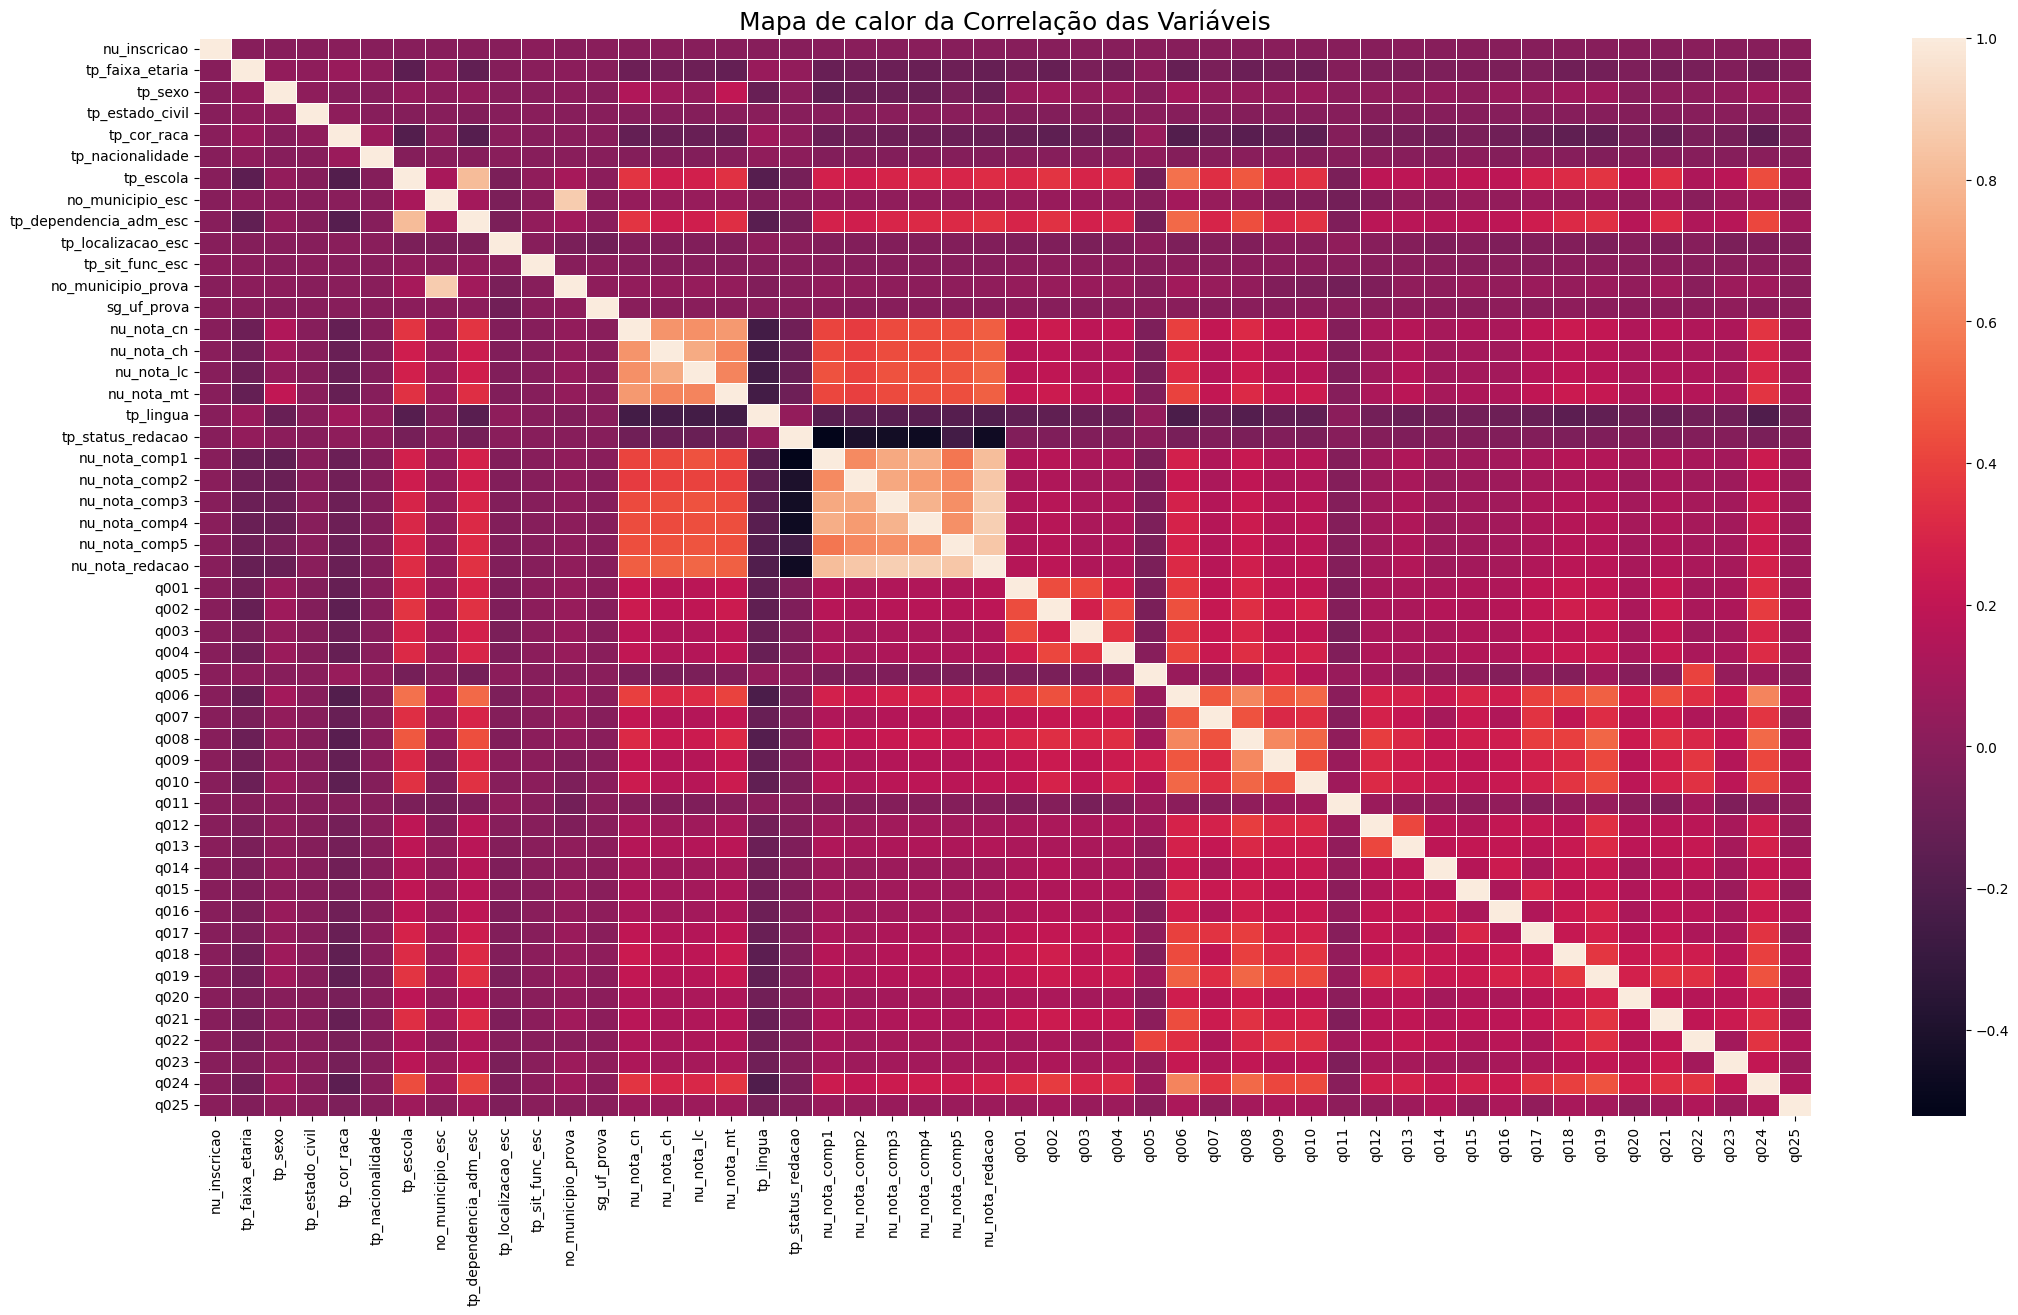

In [ ]:
# Define the plot
fig, ax = plt.subplots(figsize=(26,14))

# Add title to the Heat map
title = "Mapa de calor da Correlação das Variáveis"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(df6.corr(),linewidth=.5)

Transformando as notas em uma media total

In [ ]:
df6['nota_media_provas'] = ((df6['nu_nota_cn'] + df6['nu_nota_ch'] + df6['nu_nota_lc'] + df6['nu_nota_mt'] + df6['nu_nota_redacao']) / 5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nu_inscricao,tp_faixa_etaria,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,tp_escola,no_municipio_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,no_municipio_prova,sg_uf_prova,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,tp_lingua,tp_status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025,nota_media_provas
0,210052097511,2,0,1,1,1,0,524,3,0,0,316,23,679.200000,650.800000,651.100000,724.700000,0,0,160.000000,120.000000,140.000000,140.000000,160.000000,720.000000,3,2,3,1,1,1,0,1,2,0,0,1,1,1,0,1,0,0,1,1,0,2,1,2,1,685.160000
1,210053495342,2,0,1,1,1,0,546,1,0,0,338,23,400.600000,515.600000,414.700000,440.300000,0,0,80.000000,120.000000,100.000000,120.000000,120.000000,540.000000,4,4,2,3,4,1,0,2,1,0,0,1,1,1,0,0,0,0,1,0,1,4,0,0,1,462.240000
2,210053524905,1,0,1,1,1,0,530,1,0,0,319,23,617.100000,658.700000,576.000000,710.300000,0,0,160.000000,200.000000,160.000000,200.000000,200.000000,920.000000,4,6,3,3,3,8,0,2,2,1,0,1,1,1,0,1,0,1,1,0,1,4,0,2,1,696.420000
3,210051235712,1,0,1,1,1,0,575,1,0,0,352,23,485.100000,454.500000,535.000000,459.100000,0,0,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000,3,4,2,1,3,6,0,1,3,1,0,1,1,1,0,1,0,1,1,0,0,4,0,1,1,502.740000
4,210051574300,1,0,1,3,1,0,35,1,0,0,21,23,415.900000,407.500000,428.200000,425.800000,1,0,100.000000,40.000000,40.000000,120.000000,40.000000,340.000000,1,4,0,0,3,1,0,1,3,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,403.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111605,210054345433,2,0,1,1,1,0,235,1,0,0,146,23,506.200000,533.500000,506.700000,554.200000,0,0,120.000000,120.000000,120.000000,120.000000,80.000000,560.000000,4,4,1,1,2,4,0,1,2,1,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,532.120000
111606,210053949633,1,0,1,1,1,0,393,1,0,0,116,23,523.000000,534.600000,538.700000,516.800000,0,0,120.000000,200.000000,120.000000,140.000000,120.000000,700.000000,1,1,0,1,6,4,0,1,3,1,0,1,1,1,0,0,0,0,1,0,0,4,0,0,1,562.620000
111607,210054354738,2,1,1,3,1,0,365,1,0,0,231,23,471.900000,545.700000,543.700000,538.900000,0,0,120.000000,140.000000,120.000000,120.000000,120.000000,620.000000,3,3,3,1,4,2,0,2,3,1,0,1,1,1,0,1,0,1,1,0,0,4,0,1,1,544.040000
111608,210053127680,1,0,1,3,1,0,539,1,0,0,326,23,545.900000,579.700000,592.900000,580.600000,0,0,120.000000,120.000000,100.000000,120.000000,0.000000,460.000000,1,4,2,1,5,2,0,2,3,0,0,2,2,1,1,1,0,0,2,0,0,4,0,0,1,551.820000


In [ ]:
df7 = df6.drop(columns=['nu_nota_cn', 'nu_nota_ch', 'nu_nota_lc', 'nu_nota_mt', 'nu_nota_redacao', 'nu_nota_comp1', 'nu_nota_comp2', 'nu_nota_comp3', 'nu_nota_comp4', 'nu_nota_comp5'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Mapa de calor da Correlação das Variáveis'}>

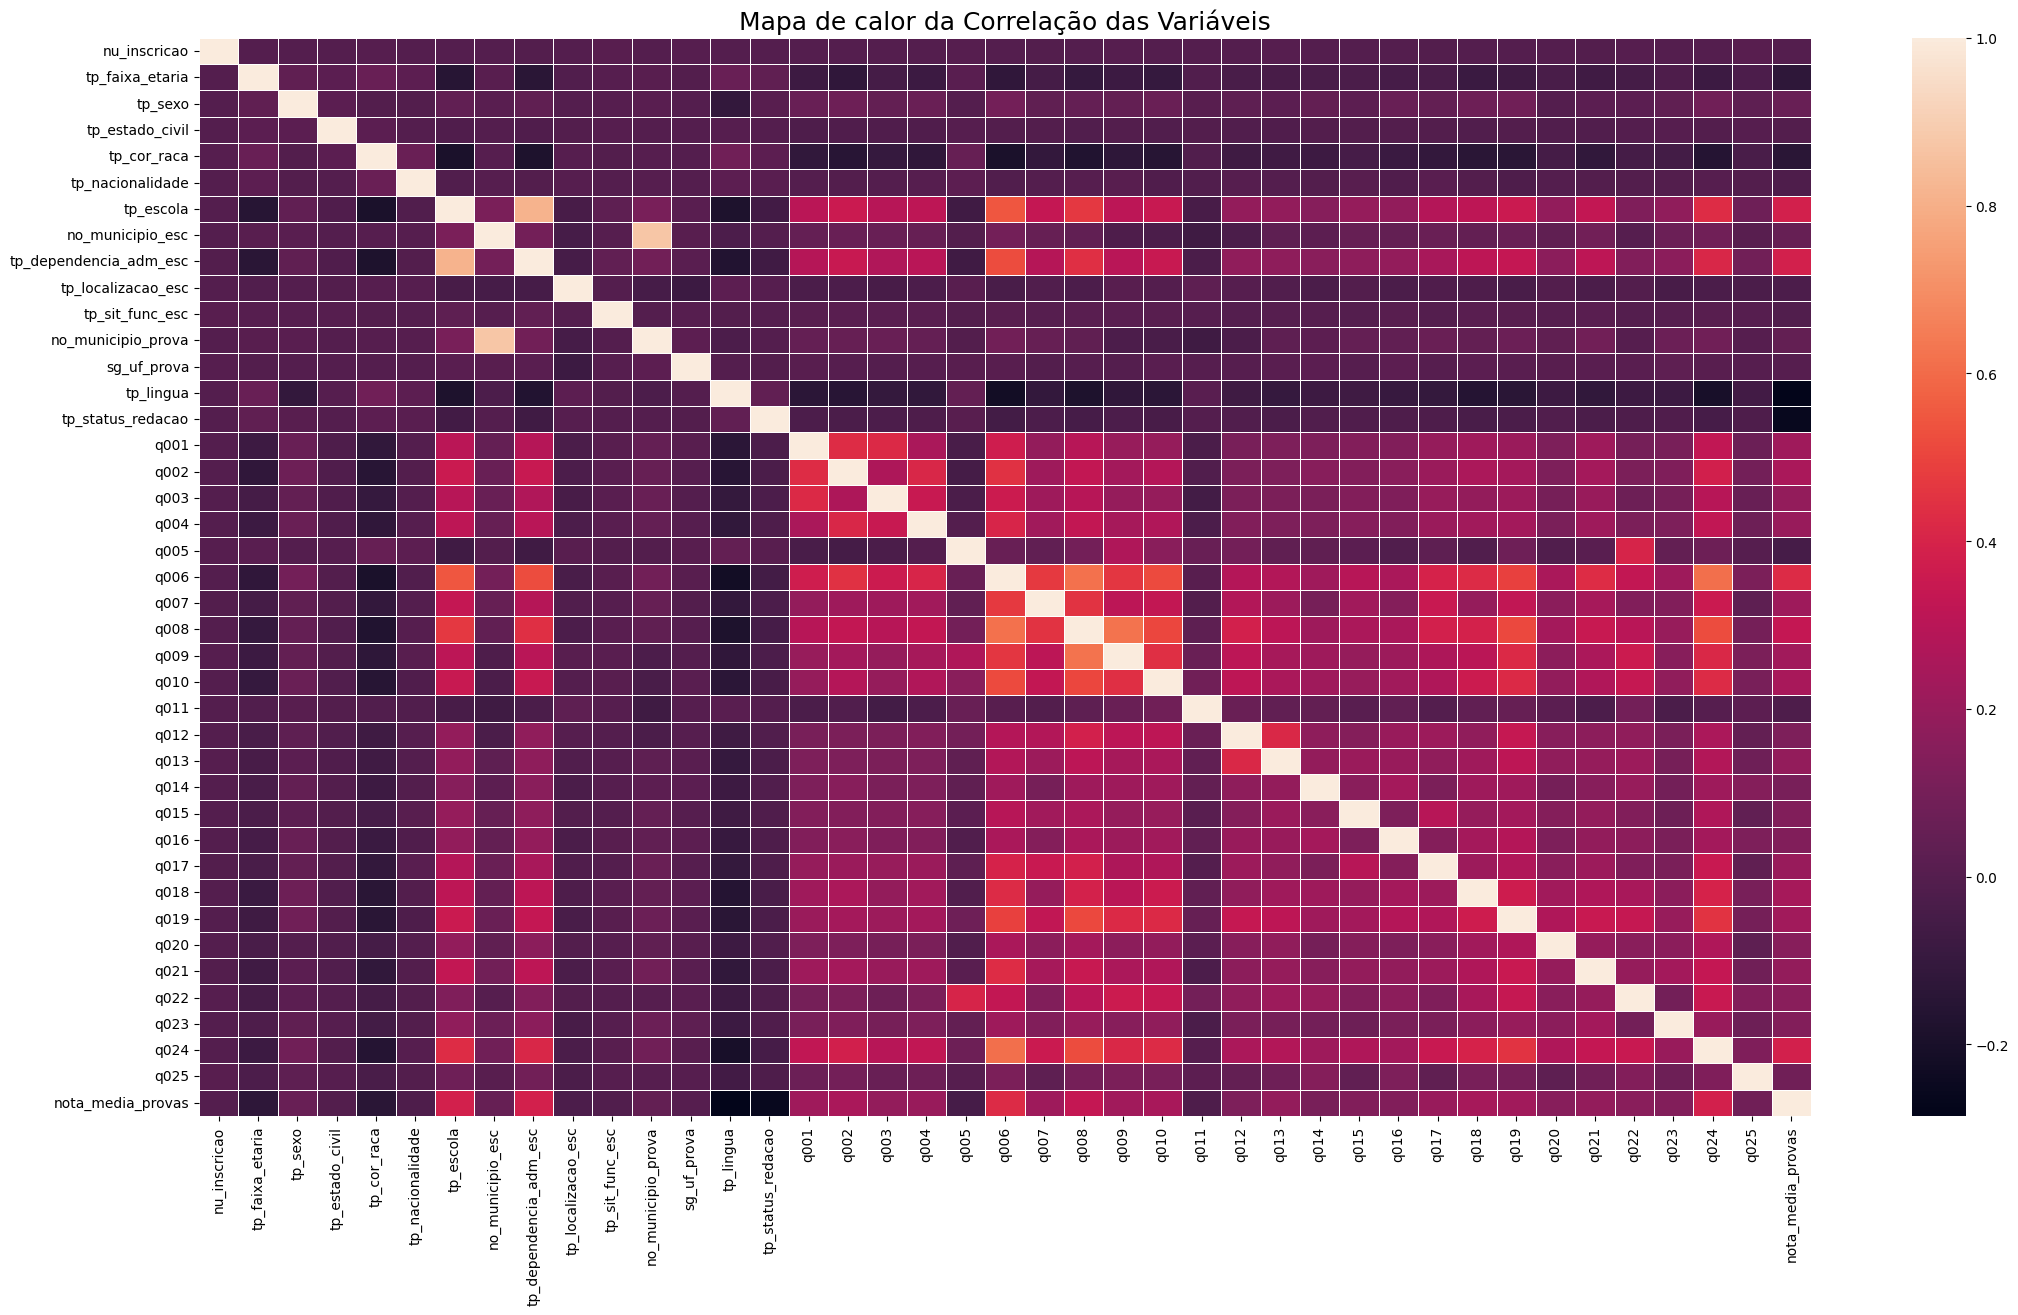

In [ ]:
# Define the plot
fig, ax = plt.subplots(figsize=(26,14))

# Add title to the Heat map
title = "Mapa de calor da Correlação das Variáveis"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(df7.corr(),linewidth=.5)

alta correlação entre no_municipio_prova e no_municipio_escola

In [ ]:
df8 = df7.drop(columns = ['no_municipio_prova'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Mapa de calor da Correlação das Variáveis'}>

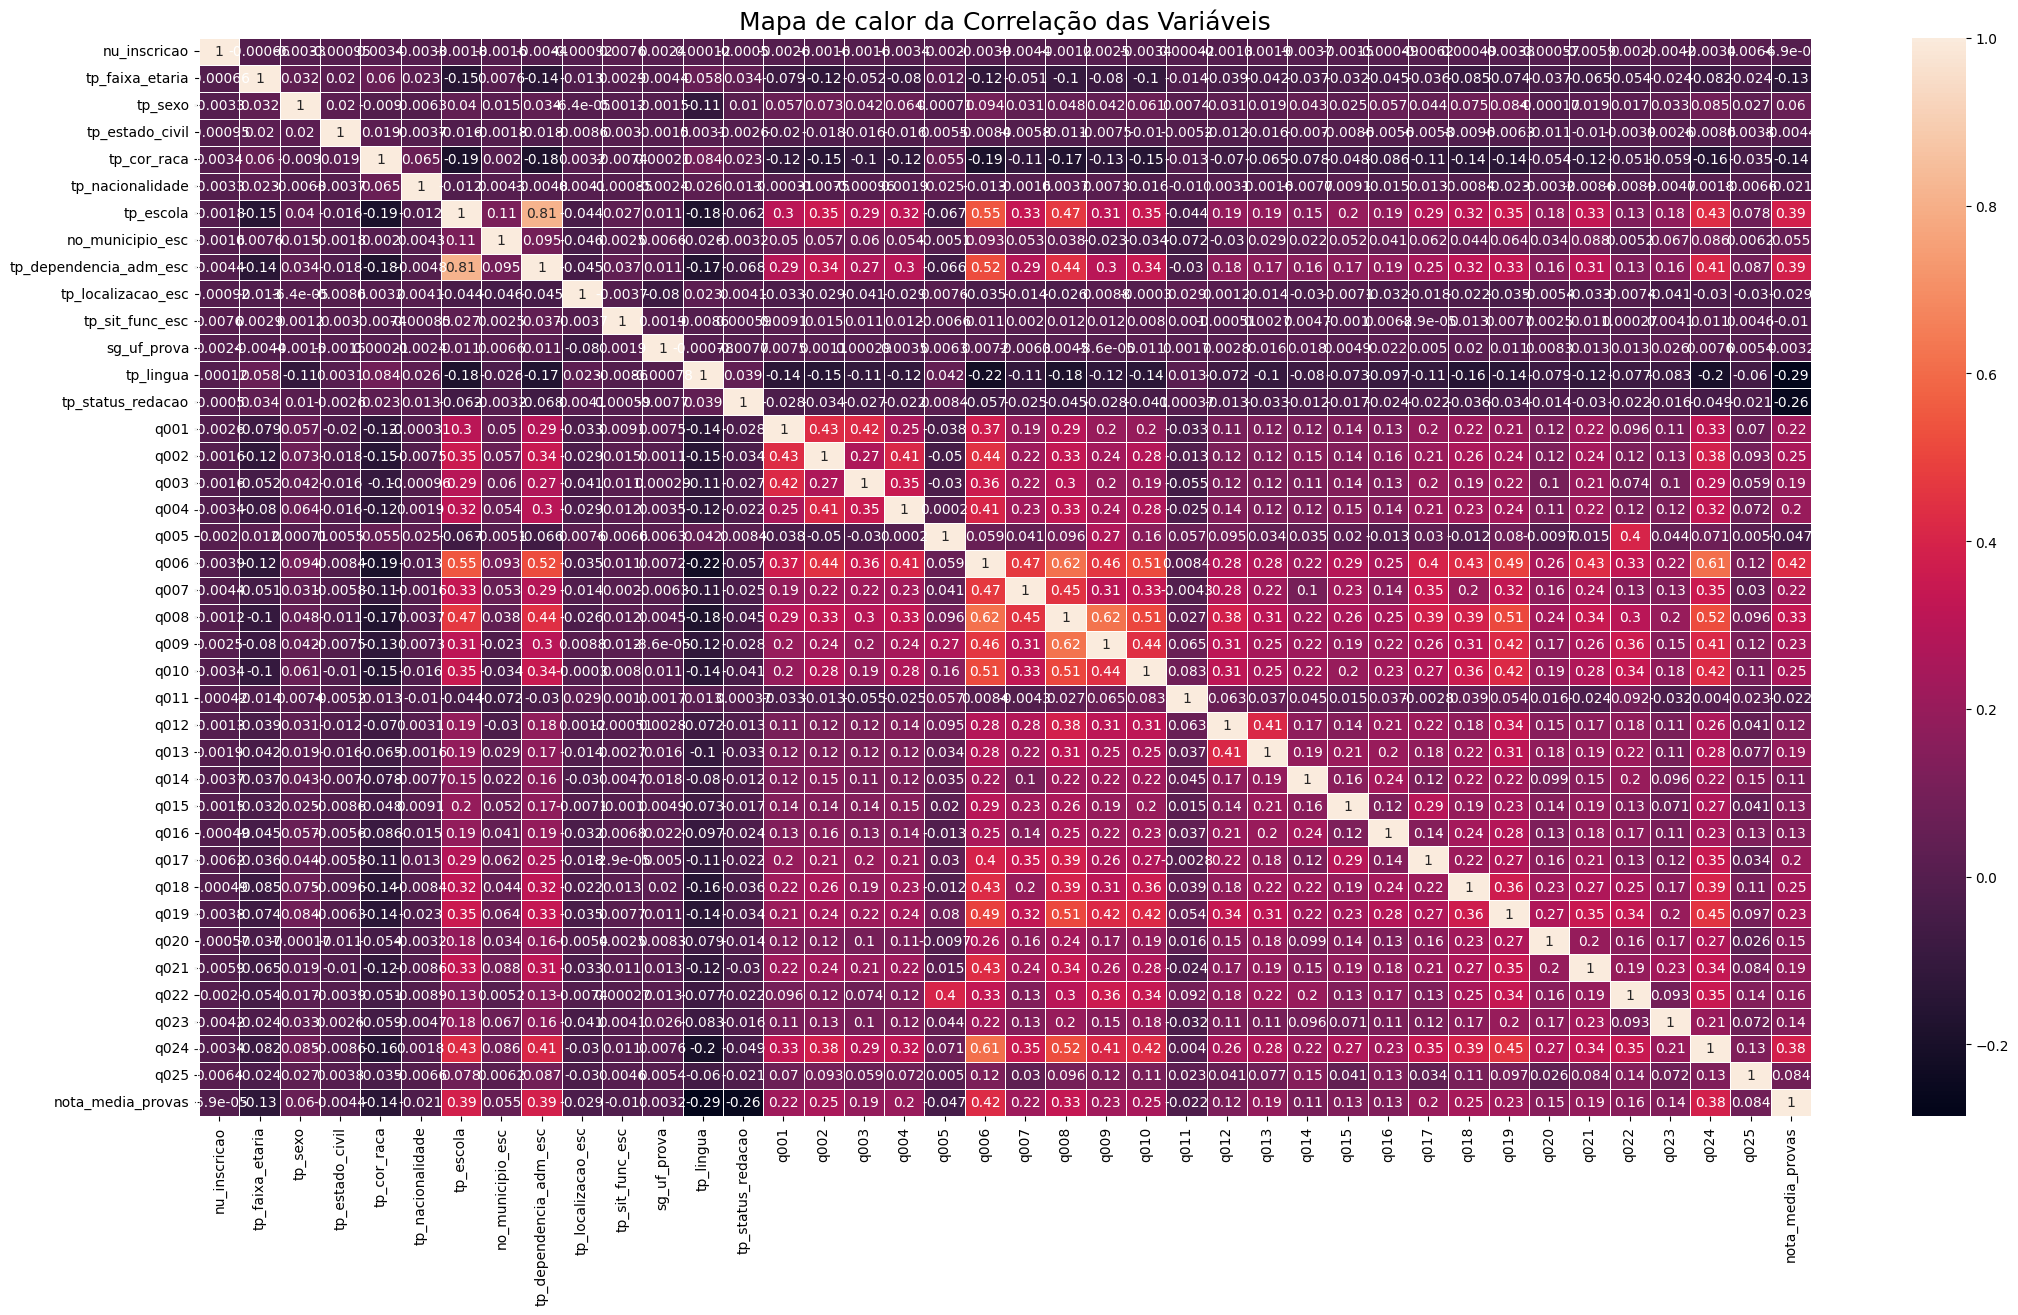

In [ ]:
# Define the plot
fig, ax = plt.subplots(figsize=(26,14))

# Add title to the Heat map
title = "Mapa de calor da Correlação das Variáveis"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(df8.corr(numeric_only=False),linewidth=.5,annot=True)

In [ ]:
crosstab = np.array(pd.crosstab(df8['tp_dependencia_adm_esc'],df8['tp_escola'], rownames=None, colnames=None)) # Cross table building
stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
obs = np.sum(crosstab) # Number of observations
mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
(stat/(obs*mini))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6845851970335286

Tratando as vaiáveis dummies #one-hot encoding

In [ ]:
df8.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


nu_inscricao                int64
tp_faixa_etaria             int64
tp_sexo                     int64
tp_estado_civil             int64
tp_cor_raca                 int64
tp_nacionalidade            int64
tp_escola                   int64
no_municipio_esc            int64
tp_dependencia_adm_esc      int64
tp_localizacao_esc          int64
tp_sit_func_esc             int64
sg_uf_prova                 int64
tp_lingua                   int64
tp_status_redacao           int64
q001                        int64
q002                        int64
q003                        int64
q004                        int64
q005                        int64
q006                        int64
q007                        int64
q008                        int64
q009                        int64
q010                        int64
q011                        int64
q012                        int64
q013                        int64
q014                        int64
q015                        int64
q016          

In [ ]:
df8 = df8.drop(columns=['nu_inscricao'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
variaveis_categoricas = ['tp_faixa_etaria', 'tp_sexo', 'tp_estado_civil', 'tp_cor_raca', 'tp_nacionalidade', 'tp_escola', 'no_municipio_esc', 'tp_dependencia_adm_esc', 'tp_localizacao_esc',
                         'tp_sit_func_esc', 'sg_uf_prova', 'tp_lingua', 'tp_status_redacao', 'q001', 'q002', 'q003', 'q004', 'q005', 'q006', 'q007', 'q008', 'q009', 'q010', 'q011', 'q012',
                         'q013', 'q014', 'q015', 'q016', 'q017', 'q018', 'q019', 'q020', 'q021', 'q022', 'q023', 'q024', 'q025']

for coluna in variaveis_categoricas:
    df8[coluna] = df8[coluna].astype('object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df8.corr(numeric_only=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tp_faixa_etaria,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,tp_escola,no_municipio_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,sg_uf_prova,tp_lingua,tp_status_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025,nota_media_provas
tp_faixa_etaria,1.000000,0.031632,0.020476,0.059857,0.023012,-0.153720,0.007636,-0.140235,-0.013191,0.002861,-0.004393,0.057841,0.034328,-0.079224,-0.123058,-0.051641,-0.080129,0.011596,-0.122684,-0.050739,-0.100772,-0.080180,-0.101333,-0.013694,-0.038739,-0.041907,-0.036545,-0.032440,-0.045156,-0.036013,-0.085110,-0.073948,-0.037117,-0.064737,-0.053844,-0.024086,-0.081832,-0.024451,-0.129251
tp_sexo,0.031632,1.000000,0.019603,-0.008959,-0.006276,0.040395,0.015343,0.033866,-0.000064,0.001249,-0.001517,-0.113293,0.010144,0.057005,0.072900,0.041637,0.064229,0.000711,0.094254,0.031108,0.048162,0.041901,0.061273,0.007361,0.030654,0.019394,0.042553,0.024609,0.056682,0.043594,0.075036,0.084303,-0.000168,0.019203,0.017330,0.033464,0.085307,0.026555,0.059932
tp_estado_civil,0.020476,0.019603,1.000000,0.019277,-0.003731,-0.016396,-0.001814,-0.017778,-0.008629,0.002963,-0.001548,0.003108,-0.002590,-0.019863,-0.018099,-0.016416,-0.015907,0.005520,-0.008359,-0.005825,-0.011281,-0.007534,-0.010380,-0.005199,-0.012333,-0.015940,-0.007014,-0.008570,-0.005593,-0.005820,-0.009591,-0.006300,-0.011435,-0.010262,-0.003919,0.002586,-0.008589,0.003843,-0.004365
tp_cor_raca,0.059857,-0.008959,0.019277,1.000000,0.064547,-0.190550,0.002029,-0.182462,0.003231,-0.007403,0.000210,0.084481,0.022809,-0.118761,-0.147895,-0.102488,-0.119893,0.054716,-0.194162,-0.113532,-0.170699,-0.127693,-0.150001,-0.012913,-0.069715,-0.065356,-0.078118,-0.047805,-0.086263,-0.110319,-0.143168,-0.140603,-0.053858,-0.118518,-0.050691,-0.058749,-0.156039,-0.034769,-0.142008
tp_nacionalidade,0.023012,-0.006276,-0.003731,0.064547,1.000000,-0.011672,0.004322,-0.004809,0.004101,-0.000846,-0.002440,0.025699,0.013258,-0.000309,-0.007454,-0.000958,0.001936,0.024540,-0.012900,-0.001630,0.003740,0.007273,-0.016237,-0.010285,0.003096,-0.001649,-0.007701,0.009143,-0.015012,0.012874,-0.008431,-0.023092,-0.003234,-0.008590,-0.008893,-0.004703,0.001804,-0.006564,-0.021044
tp_escola,-0.153720,0.040395,-0.016396,-0.190550,-0.011672,1.000000,0.112581,0.813301,-0.043722,0.027276,0.011169,-0.179978,-0.061794,0.303926,0.353888,0.292568,0.315167,-0.067340,0.545226,0.332601,0.465185,0.307920,0.346011,-0.043961,0.187948,0.186250,0.147002,0.195267,0.186252,0.285290,0.316868,0.352755,0.184688,0.329308,0.129116,0.176740,0.430743,0.077814,0.386028
no_municipio_esc,0.007636,0.015343,-0.001814,0.002029,0.004322,0.112581,1.000000,0.095407,-0.045980,0.002492,0.006550,-0.026172,-0.003229,0.049991,0.056810,0.060306,0.053851,-0.005119,0.092824,0.052560,0.038434,-0.023331,-0.034052,-0.072206,-0.030019,0.028872,0.022291,0.052089,0.041271,0.062306,0.043828,0.064055,0.034469,0.088249,0.005169,0.066662,0.086005,0.006159,0.055076
tp_dependencia_adm_esc,-0.140235,0.033866,-0.017778,-0.182462,-0.004809,0.813301,0.095407,1.000000,-0.044538,0.036532,0.011303,-0.167167,-0.068370,0.289732,0.344604,0.273575,0.298183,-0.066444,0.522103,0.290346,0.439489,0.301942,0.344364,-0.029893,0.177332,0.173365,0.157568,0.173388,0.189330,0.250761,0.315199,0.334500,0.163572,0.314205,0.132627,0.162335,0.411753,0.086804,0.385497
tp_localizacao_esc,-0.013191,-0.000064,-0.008629,0.003231,0.004101,-0.043722,-0.045980,-0.044538,1.000000,-0.003671,-0.079905,0.023456,0.004088,-0.033362,-0.029274,-0.041317,-0.028795,0.007591,-0.034589,-0.013863,-0.025786,0.008807,-0.000296,0.029111,0.001174,-0.013563,-0.030102,-0.007107,-0.032197,-0.017872,-0.021517,-0.035310,-0.005427,-0.033375,-0.007356,-0.041106,-0.030257,-0.030385,-0.028590
tp_sit_func_esc,0.002861,0.001249,0.002963,-0.007403,-0.000846,0.027276,0.002492,0.036532,-0.003671,1.000000,0.001867,-0.008633,0.000592,0.009068,0.014873,0.011176,0.012115,-0.006624,0.01060

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Mapa de calor da Correlação das Variáveis'}>

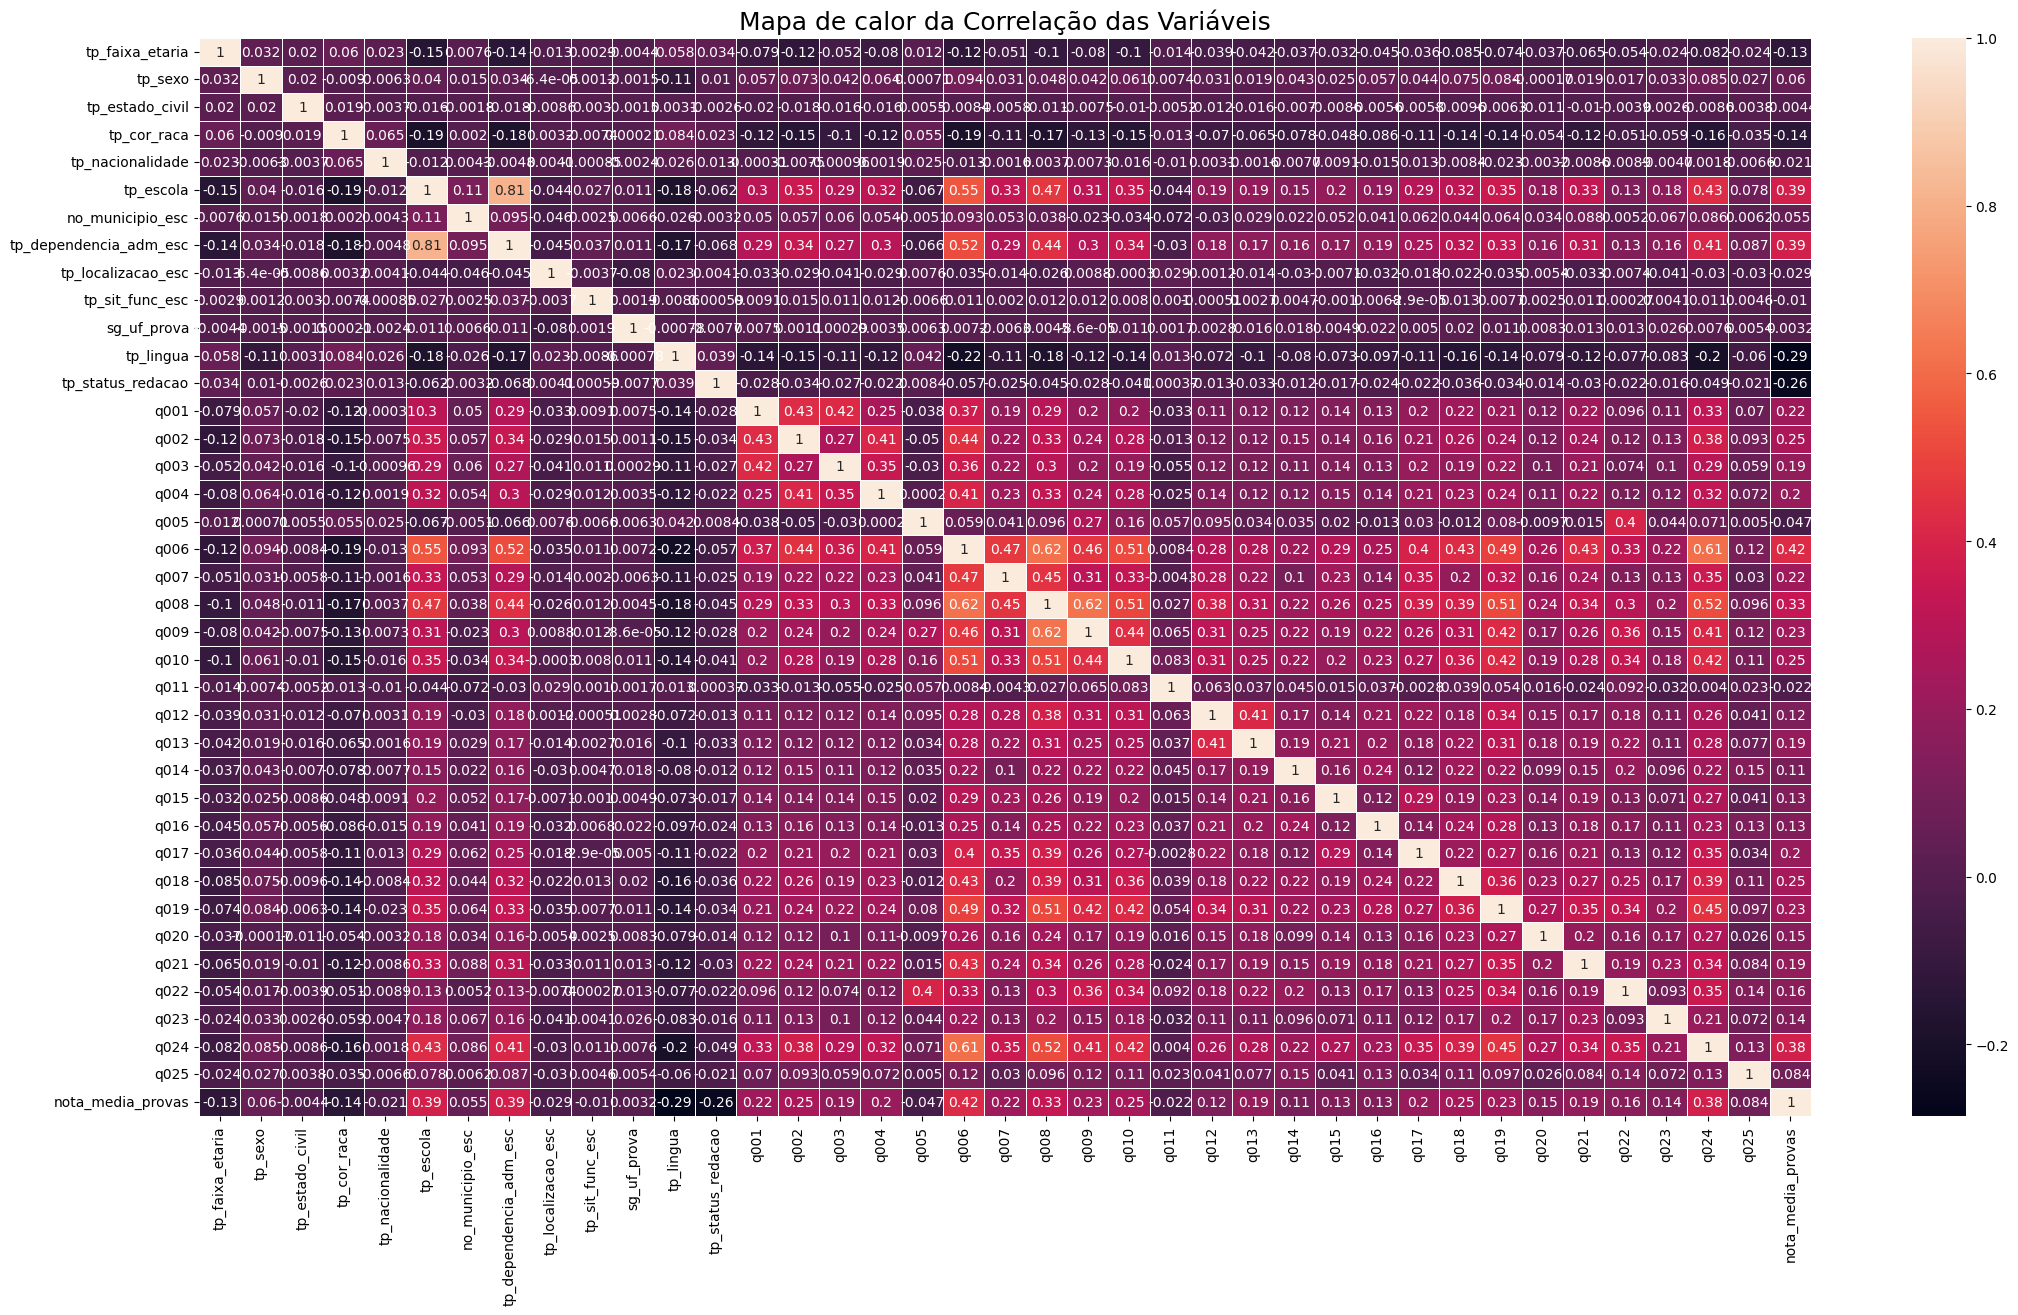

In [ ]:
# Define the plot
fig, ax = plt.subplots(figsize=(26,14))

# Add title to the Heat map
title = "Mapa de calor da Correlação das Variáveis"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(df8.corr(numeric_only=False),linewidth=.5,annot=True)

In [ ]:
df9 = pd.get_dummies(df8, drop_first=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-fd2857f0e664>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df9 = pd.get_dummies(df8, drop_first=True)
<ipython-input-16-fd2857f0e664>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df9 = pd.get_dummies(df8, drop_first=True)
<ipython-input-16-fd2857f0e664>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


In [ ]:
df9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nota_media_provas,tp_faixa_etaria_1,tp_faixa_etaria_2,tp_faixa_etaria_3,tp_faixa_etaria_4,tp_faixa_etaria_5,tp_faixa_etaria_6,tp_faixa_etaria_7,tp_faixa_etaria_8,tp_faixa_etaria_9,tp_faixa_etaria_10,tp_faixa_etaria_11,tp_faixa_etaria_12,tp_faixa_etaria_13,tp_faixa_etaria_14,tp_sexo_1,tp_estado_civil_1,tp_estado_civil_2,tp_estado_civil_3,tp_estado_civil_4,tp_cor_raca_1,tp_cor_raca_2,tp_cor_raca_3,tp_cor_raca_4,tp_cor_raca_5,tp_nacionalidade_1,tp_nacionalidade_2,tp_nacionalidade_3,tp_nacionalidade_4,tp_escola_1,no_municipio_esc_1,no_municipio_esc_2,no_municipio_esc_3,no_municipio_esc_4,no_municipio_esc_5,no_municipio_esc_6,no_municipio_esc_7,no_municipio_esc_8,no_municipio_esc_9,no_municipio_esc_10,...,q012_2,q012_3,q012_4,q013_1,q013_2,q013_3,q013_4,q014_1,q014_2,q014_3,q014_4,q015_1,q015_2,q015_3,q015_4,q016_1,q016_2,q016_3,q016_4,q017_1,q017_2,q017_3,q017_4,q018_1,q019_1,q019_2,q019_3,q019_4,q020_1,q021_1,q022_1,q022_2,q022_3,q022_4,q023_1,q024_1,q024_2,q024_3,q024_4,q025_1
0,685.160000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
1,462.240000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,696.420000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,502.740000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,403.480000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111605,532.120000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
111606,562.620000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111607,544.040000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
111608,551.820000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
df9.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(111610, 799)

In [ ]:
limit = 0.95
corr = df8.corr()
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_no_diag = corr.where(mask)
col = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c]) > limit)]
col

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-a6f5df3c178f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df8.corr()


[]

In [ ]:
from sklearn import preprocessing

std = preprocessing.StandardScaler()
std.fit_transform(df9)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 1.49161585, -1.2026891 ,  1.27081899, ..., -0.33170491,
        -0.25873888,  0.11576639],
       [-1.1980216 , -1.2026891 ,  1.27081899, ..., -0.33170491,
        -0.25873888,  0.11576639],
       [ 1.62747319,  0.83147008, -0.78689413, ..., -0.33170491,
        -0.25873888,  0.11576639],
       ...,
       [-0.2110651 , -1.2026891 ,  1.27081899, ..., -0.33170491,
        -0.25873888,  0.11576639],
       [-0.11719564,  0.83147008, -0.78689413, ..., -0.33170491,
        -0.25873888,  0.11576639],
       [-0.00257356, -1.2026891 ,  1.27081899, ..., -0.33170491,
        -0.25873888,  0.11576639]])

In [ ]:
df_x = df9.drop(columns = ['nota_media_provas'])
df_y = df9['nota_media_provas']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression().fit(df_x, df_y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
r_sq = modelo.score(df_x, df_y)
print(f"coefficient of determination: {r_sq}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


coefficient of determination: 0.3741472115646266


In [ ]:
print(f"coefficients: {modelo.coef_}")

coefficients: [ 5.91322036e+00  1.02375101e+00 -3.20700951e+01 -4.14757634e+01
 -4.85894854e+01 -4.52147739e+01 -2.48929051e+01 -9.31905816e+01
  1.48334774e+01 -4.71885205e+01 -1.55053720e+01 -7.04522480e+01
 -1.43130697e+01 -3.63500902e+01  2.64583132e+00  4.57799693e+00
 -1.95228217e+00  1.04180194e+00 -1.91846284e+01  1.59350184e+00
 -1.09979058e+01 -5.18036970e+00  1.96464645e+01 -2.10406266e+01
  2.47339938e+01  1.48826300e+00  2.53779089e+01  2.43611274e+01
  6.11212767e+00 -2.72211891e+01 -2.93184185e+01  1.05228318e+01
 -3.88152376e+01 -3.60416584e+01 -5.71322978e+01 -4.17868648e+01
 -1.07505294e+02 -9.51475446e+00  5.92507438e+01  3.06631984e+00
  2.28395459e+01 -3.71489456e+01 -3.53808213e+01 -7.86778688e+01
 -2.19363504e+01  1.14565458e+01 -4.75429191e+01 -8.50404531e+00
 -2.57530362e+01  1.23303691e+01  8.28429069e+00 -2.83902508e+01
  1.00311473e+00 -1.26430117e+02 -4.82191975e+00  5.70388743e+00
 -1.63731362e+01 -1.80147188e+00 -2.46777789e+01  1.37900750e+01
 -3.3386123

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
